# Teleportation

https://learn.qiskit.org/course/basics/entanglement-in-action#entanglement-2-0

In [4]:
from qiskit import *
import numpy as np

In [5]:
class teleprotocol:
    def __init__(self,nq,ne0,ne1,input):
        self.n=n
        self.input=input
        self.qubit = QuantumRegister(nq, "Q")
        self.ebit0 = QuantumRegister(ne0, "Alice")
        self.ebit1 = QuantumRegister(ne1, "Bob")
        self.a = ClassicalRegister(nq, "Alice Q")
        self.b = ClassicalRegister(ne0, "Alice A")
        self.c = ClassicalRegister(ne1, "Bob B")     
        self.d = ClassicalRegister(ne1, "Spion")     
        

    def Qcirc(self): 
        qc = QuantumCircuit(self.qubit,self.ebit0,self.ebit1)
        for i in range(0, self.n):
            if self.input[i]==1:
             qc.x(self.qubit[i])
             qc.h(self.qubit[i])
            if self.input[i]==0:
             qc.h(self.qubit[i])             
#            qc.u(np.pi/2,np.pi/4,np.pi/8,self.qubit[i])
        return qc
    
    def Acirc(self):    
        qc = QuantumCircuit(self.qubit,self.ebit0,self.ebit1)
        qc.h(self.ebit0)
        qc.cx(self.ebit0, self.ebit1)
        qc.barrier()
        return qc
        
    def QAcirc(self):    
        qc = QuantumCircuit(self.qubit,self.ebit0,self.ebit1)
        qc.cx(self.qubit,self.ebit0)
        qc.h(self.qubit)
        qc.barrier() 
        return qc

    def M0circ(self):  
        qc = QuantumCircuit(self.qubit,self.ebit0,self.ebit1,self.a,self.b,self.c,self.d)   
        qc.measure(self.ebit0, self.a)
        qc.measure(self.qubit, self.b)
        qc.barrier() 
        return qc
    
    def M1circ(self):  
        qc = QuantumCircuit(self.qubit,self.ebit0,self.ebit1,self.a,self.b,self.c,self.d)          
        for i in range(0, self.n):
            with qc.if_test((self.a[i], 1)):
                 qc.x(self.ebit1[i])
            with qc.if_test((self.b[i], 1)):
                 qc.z(self.ebit1[i])
        qc.barrier() 
        return qc,self.a,self.b
    
    def SPcirc(self):  
        qc = QuantumCircuit(self.qubit,self.ebit0,self.ebit1,self.a,self.b,self.c,self.d)   
        qc.measure(self.ebit1, self.d)
        qc.barrier() 
        return qc,self.d

    def Bobmeasure(self):  
        qc = QuantumCircuit(self.qubit,self.ebit0,self.ebit1,self.a,self.b,self.c,self.d) 
        qc.h(self.ebit1)
        qc.measure(self.ebit1, self.c)
        qc.barrier() 
        return qc,self.c


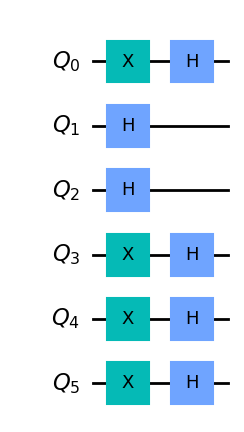

In [31]:
n=6
input=[1,0,0,1,1,1]
qc=teleprotocol(n,0,0,input).Qcirc()
qc.draw('mpl')

In [32]:
backend = Aer.get_backend('statevector_simulator')
# Create a Quantum Program for execution 
job = backend.run(qc)
result = job.result()
qubitstate = result.get_statevector(qc, decimals=3)
qubitstate.draw('latex')

<IPython.core.display.Latex object>

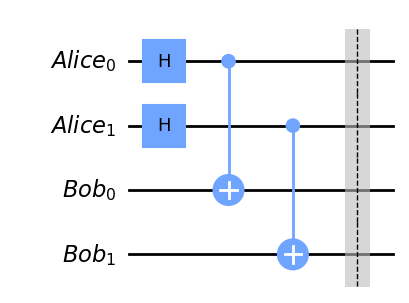

In [8]:
qc=teleprotocol(0,n,n,input).Acirc()
qc.draw('mpl')

In [9]:
backend = Aer.get_backend('statevector_simulator')
# Create a Quantum Program for execution 
job = backend.run(qc)
result = job.result()
qcstate = result.get_statevector(qc, decimals=3)
qcstate.draw('latex')

<IPython.core.display.Latex object>

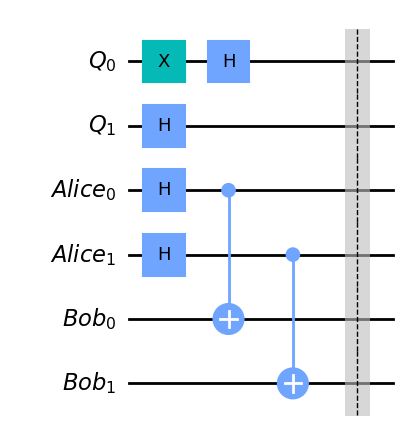

In [10]:
qc1=teleprotocol(n,n,n,input).Qcirc()
qc2=teleprotocol(n,n,n,input).Acirc()
qc3=teleprotocol(n,n,n,input).QAcirc()
qcSpion,c=teleprotocol(n,n,n,input).SPcirc()
qcnew = qc1.compose(qc2)
#qcnew = qcnew.compose(qc3)
#qcnew = qcnew.compose(qcSpion)




qcnew.draw('mpl')

In [12]:
backend = Aer.get_backend('statevector_simulator')
# Create a Quantum Program for execution 
job = backend.run(qcnew)
result = job.result()
qcstate = result.get_statevector(qcnew, decimals=3)
qcstate.draw('latex')


<IPython.core.display.Latex object>

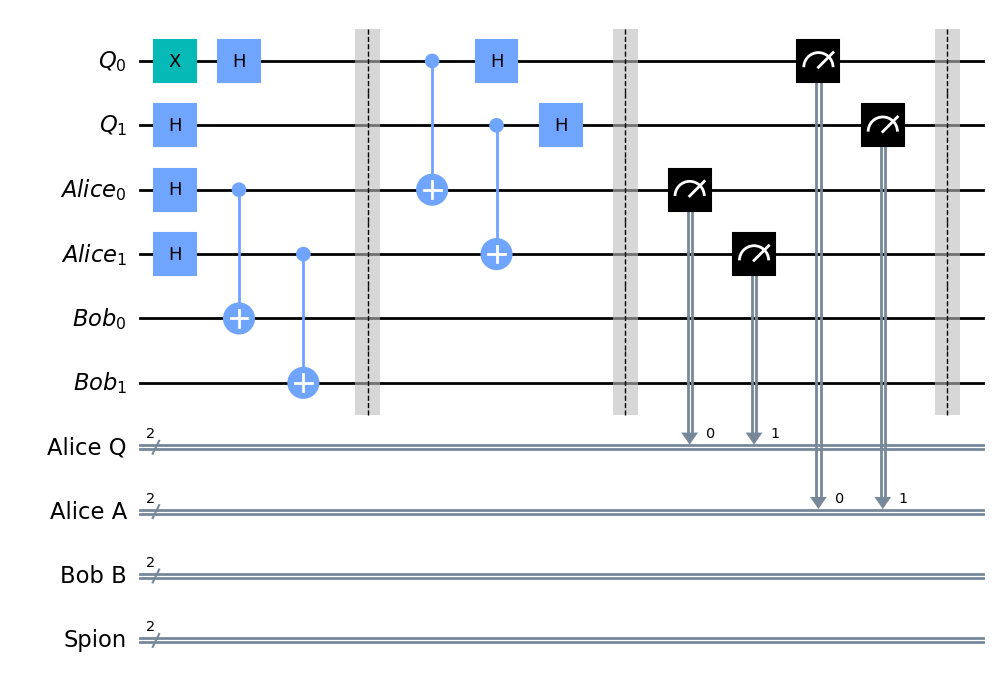

In [15]:
qc1=teleprotocol(n,n,n,input).Qcirc()
qc2=teleprotocol(n,n,n,input).Acirc()
qc3=teleprotocol(n,n,n,input).QAcirc()
qc4=teleprotocol(n,n,n,input).M0circ()
qc5,a,b=teleprotocol(n,n,n,input).M1circ()
qcSpion,c=teleprotocol(n,n,n,input).SPcirc()
qc6,d=teleprotocol(n,n,n,input).Bobmeasure()

#qcnew = qc1
qcnew = qc1.compose(qc2)
qcnew = qcnew.compose(qc3)
qcnew = qcnew.compose(qc4)


qcnew.draw('mpl')

In [24]:
job=backend.run(qcnew,shots=1)
result=job.result()
qcstate = result.get_statevector(qcnew, decimals=3)
qcstate.draw('latex')

<IPython.core.display.Latex object>

In [25]:
counts=result.get_counts(qcnew)
print(counts)

{'00 00 00 00': 1}


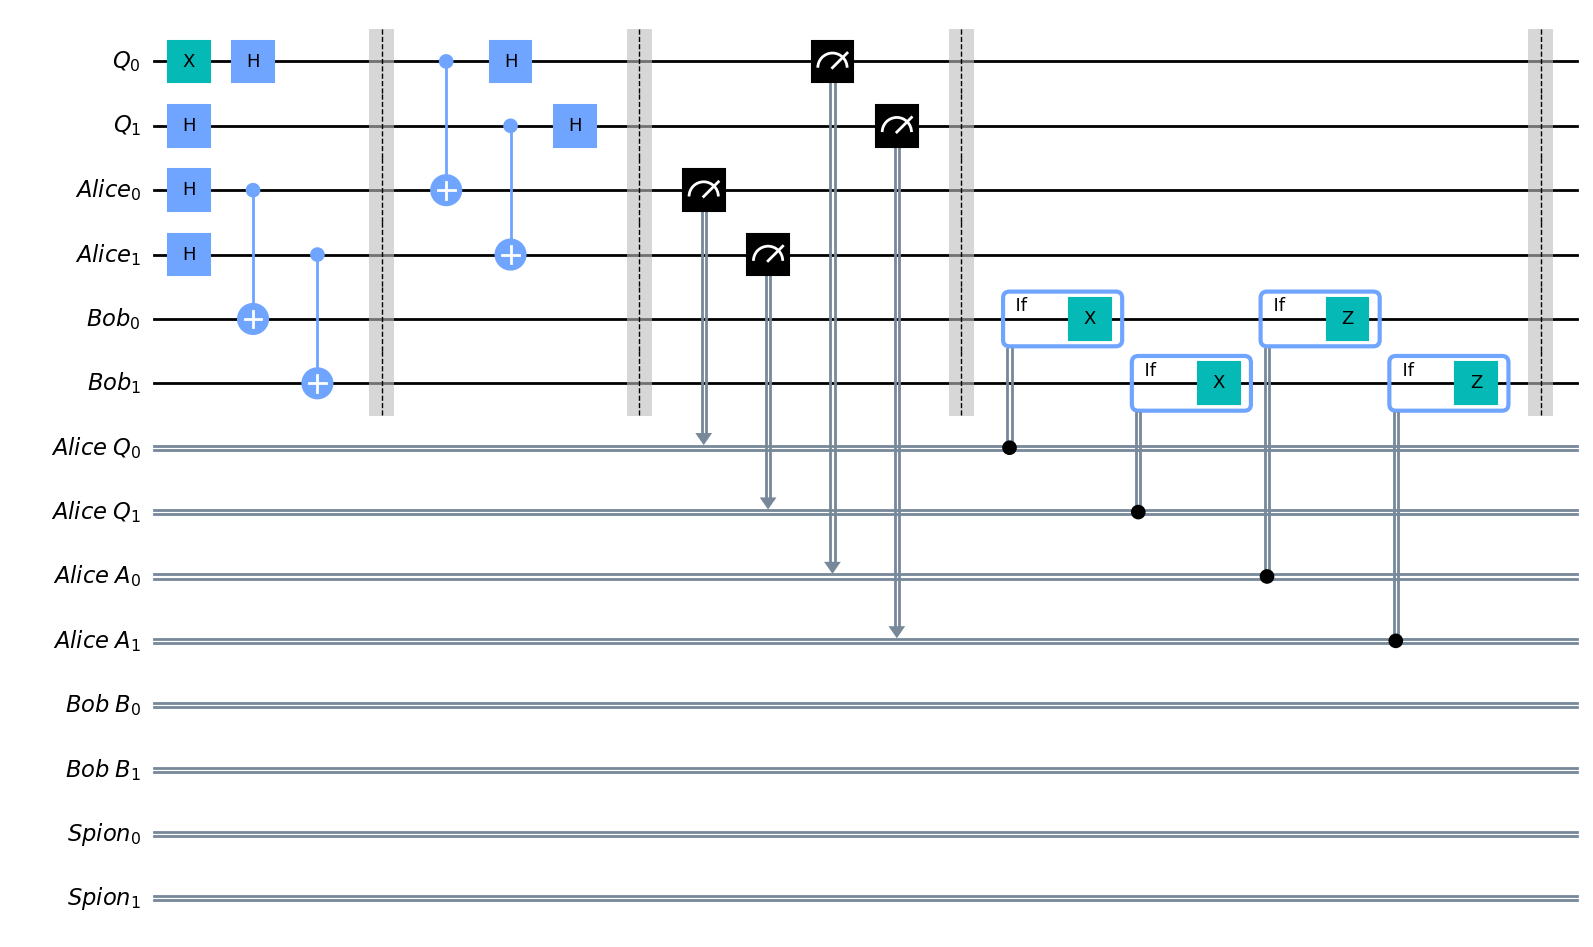

In [26]:
qc1=teleprotocol(n,n,n,input).Qcirc()
qc2=teleprotocol(n,n,n,input).Acirc()
qc3=teleprotocol(n,n,n,input).QAcirc()
qc4=teleprotocol(n,n,n,input).M0circ()
qc5,a,b=teleprotocol(n,n,n,input).M1circ()
qcSpion,c=teleprotocol(n,n,n,input).SPcirc()
qc6,d=teleprotocol(n,n,n,input).Bobmeasure()

#qcnew = qc1
qcnew = qc1.compose(qc2)
spion = qcnew.compose(qcSpion)
#qcnew = qcnew.compose(qcSpion)
qcnew = qcnew.compose(qc3)
qcnew = qcnew.compose(qc4)
qcnew = qcnew.compose(qc5)


qcnew.draw('mpl')

In [27]:
job=backend.run(qcnew,shots=1)
result=job.result()
qcstate = result.get_statevector(qcnew, decimals=3)
qcstate.draw('latex')

<IPython.core.display.Latex object>

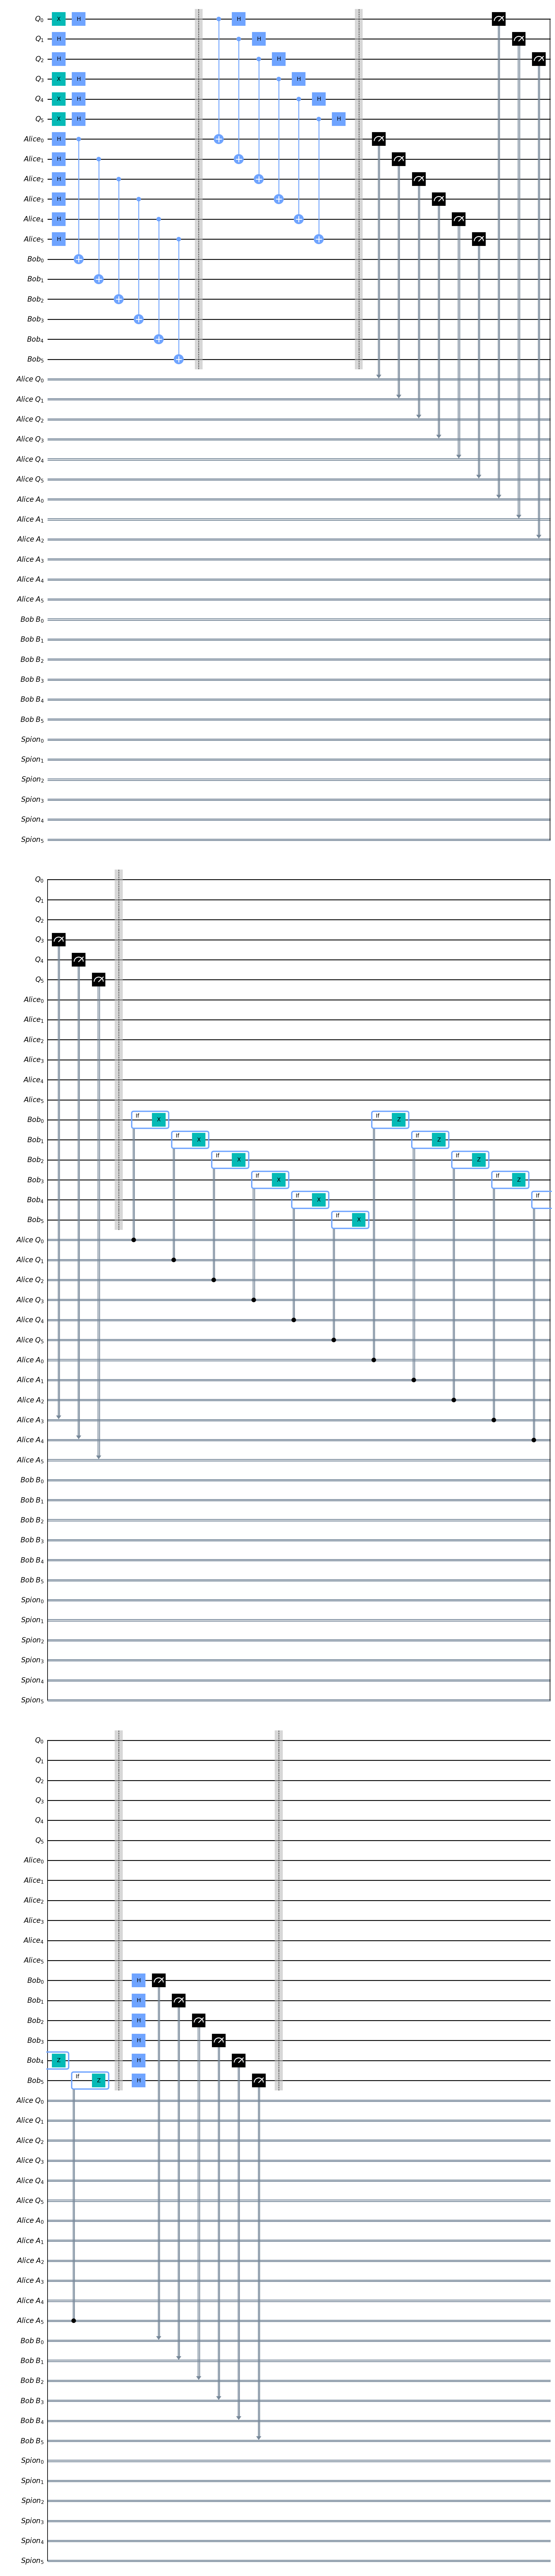

In [33]:
qc1=teleprotocol(n,n,n,input).Qcirc()
qc2=teleprotocol(n,n,n,input).Acirc()
qc3=teleprotocol(n,n,n,input).QAcirc()
qc4=teleprotocol(n,n,n,input).M0circ()
qc5,a,b=teleprotocol(n,n,n,input).M1circ()
qcSpion,c=teleprotocol(n,n,n,input).SPcirc()
qc6,d=teleprotocol(n,n,n,input).Bobmeasure()

#qcnew = qc1
qcnew = qc1.compose(qc2)
spion = qcnew.compose(qcSpion)
#qcnew = qcnew.compose(qcSpion)
qcnew = qcnew.compose(qc3)
qcnew = qcnew.compose(qc4)
qcnew = qcnew.compose(qc5)
qcnew = qcnew.compose(qc6)

qcnew.draw('mpl')

In [34]:
job=backend.run(qcnew,shots=1)
result=job.result()
qcstate = result.get_statevector(qcnew, decimals=3)
qcstate.draw('latex')

<IPython.core.display.Latex object>

In [36]:
counts=result.get_counts(qcnew)
print(counts)

{'000000 111001 100001 101010': 1}
